## Pymaceuticals Inc.

#### Analysis
- The data indicate that Capomulin and Ramicane were the most effective treatments, with treatment with Capomulin resulting in a 31.1% reduction in tumor volume and an 84% survival rate at 45 days, and treatment with Ramicane resulting in a 25.4% reduction in tumor volume and an 80% survival rate at 45 days.
- Propriva and Stelasyn appear to be the least effective treatments, with treatment with Propriva resulting in a 55.9% increase in tumor volume and a survival rate of 26.9% at 45 days, and treatment with Stelasyn resulting in a 61.2% increase in tumor volume and a survival rate of 42.3% at 45 days.
- Propriva, Infubinol, Stelasyn, and Ketabril all had survival rates below that of the placebo condition at 45 days, indicating that these treatments may be more detrimental than helpful in the treatment of cancer.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from scipy.stats import sem

In [22]:
# Import data
clinical_trial_data = "raw_data/clinicaltrial_data.csv"
clinical_df = pd.read_csv(clinical_trial_data)

mouse_drug_data = "raw_data/mouse_drug_data.csv"
mouse_df = pd.read_csv(mouse_drug_data)

In [23]:
print(len(clinical_df))
clinical_df.head()

1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [24]:
print(len(mouse_df))
mouse = mouse_df.set_index('Mouse ID')
# mouse_df.head()
mouse.head()

250


,Drug
Mouse ID,
f234,Stelasyn
x402,Stelasyn
a492,Stelasyn
w540,Stelasyn
v764,Stelasyn


In [25]:
# Bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [407]:
# Merge datasets / add 'drug' column to clinical data
pymaceutical_df = clinical_df.merge(mouse_df, how='left', on='Mouse ID')
data = clinical_df.merge(mouse_df, how='left', on='Mouse ID')
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [466]:
# Group by drug type, get means and standard errors
drug_means = pymaceutical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
drug_means.rename(columns={'Drug':'drug','Timepoint':'timepoint','Tumor Volume (mm3)':'vol_mean'},
                 inplace=True)
drug_sem = pymaceutical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
drug_sem.rename(columns={'Drug':'drug','Timepoint':'timepoint','Tumor Volume (mm3)':'vol_sem'},
               inplace=True)
drug_df = drug_means.merge(drug_sem, on=['drug', 'timepoint'])
drug_df.head()

,drug,timepoint,vol_mean,vol_sem
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


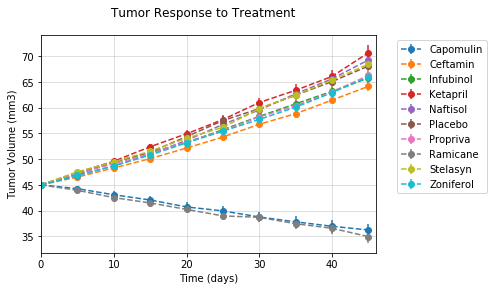

In [467]:
# Scatter plot that shows how the tumor volume changes over time for each treatment.
fig, ax = plt.subplots()
for name, group in drug_df.groupby('drug'):
    ax.errorbar(group.timepoint, group.vol_mean, group.vol_sem, fmt='o', linestyle='--', label=name)
    ax.legend(bbox_to_anchor=(1.05, 1.0))

ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")
fig.suptitle("Tumor Response to Treatment")

plt.xlim(min(drug_df['timepoint']), max(drug_df['timepoint'])+1)
plt.grid(alpha=0.5)
plt.show()

## Metastatic Response to Treatment

In [468]:
# Group by drug type, get means and standard errors
metastatic_means = pymaceutical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()
metastatic_means.rename(columns={'Drug':'drug','Timepoint':'timepoint','Metastatic Sites':'metastatic_mean'},
                 inplace=True)
metastatic_sem = pymaceutical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()
metastatic_sem.rename(columns={'Drug':'drug','Timepoint':'timepoint','Metastatic Sites':'metastatic_sem'},
               inplace=True)
metastatic_df = metastatic_means.merge(metastatic_sem, on=['drug', 'timepoint'])
metastatic_df.head()

,drug,timepoint,metastatic_mean,metastatic_sem
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


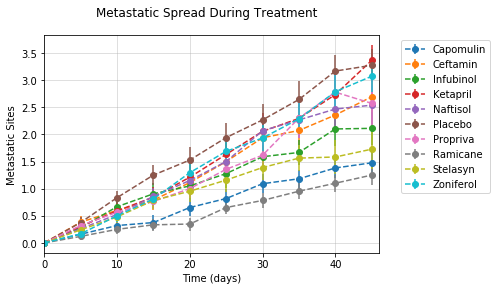

In [469]:
# Scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
fig, ax = plt.subplots()
for name, group in metastatic_df.groupby('drug'):
    ax.errorbar(group.timepoint, group.metastatic_mean, group.metastatic_sem, fmt='o', linestyle='--', label=name)
    ax.legend(bbox_to_anchor=(1.05, 1.0))

ax.set_xlabel("Time (days)")
ax.set_ylabel("Metastatic Sites")
fig.suptitle("Metastatic Spread During Treatment")

plt.xlim(min(drug_df['timepoint']), max(drug_df['timepoint'])+1)
plt.grid(alpha=0.5)
plt.show()

## Survival Rates

In [470]:
# Group by drug type, get means and standard errors
survival_df = data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().reset_index()
survival_df.rename(columns={'Drug':'drug','Timepoint':'timepoint','Mouse ID':'mouse_counts'}, inplace=True)

# Calculate survival rates
mouse_start_counts = data[data['Timepoint'] == 0].groupby(['Drug'])['Mouse ID'].count().reset_index()
mouse_start_counts.rename(columns={'Drug':'drug','Mouse ID':'mouse_total'}, inplace=True)

# survival_df['total_mice']
survival_df = survival_df.merge(mouse_start_counts, on='drug')
survival_df['survival_rate'] = (survival_df['mouse_counts'] / survival_df['mouse_total']) * 100

survival_df[survival_df['timepoint']==45]

,drug,timepoint,mouse_counts,mouse_total,survival_rate
9,Capomulin,45,21,25,84.000000
19,Ceftamin,45,13,25,52.000000
29,Infubinol,45,9,25,36.000000
39,Ketapril,45,11,25,44.000000
49,Naftisol,45,13,25,52.000000
59,Placebo,45,11,25,44.000000
69,Propriva,45,7,26,26.923077
79,Ramicane,45,20,25,80.000000
89,Stelasyn,45,11,26,42.307692
99,Zoniferol,45,14,25,56.000000


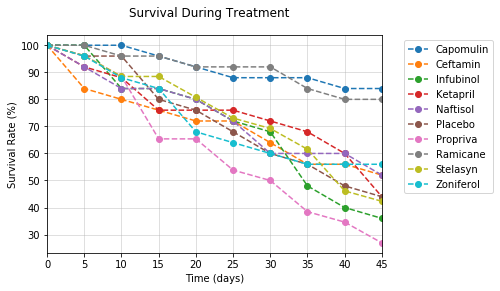

In [471]:
# Scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
fig, ax = plt.subplots()
for name, group in survival_df.groupby('drug'):
    ax.plot(group.timepoint, group.survival_rate, label=name, linestyle='--', marker='o')
    ax.legend(bbox_to_anchor=(1.05, 1.0))

ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate (%)")
fig.suptitle("Survival During Treatment")

plt.xlim(min(drug_df['timepoint']), max(drug_df['timepoint']))
plt.grid(alpha=0.5)
plt.show()

## Summary Bar Graph

In [473]:
# Group data by drug with total % tumor volume change
tumor_vol = data.groupby('Drug').agg({'Tumor Volume (mm3)':['first','last']})
tumor_vol['pcnt_change'] = ((tumor_vol['Tumor Volume (mm3)']['last'] - tumor_vol['Tumor Volume (mm3)']['first']) / tumor_vol['Tumor Volume (mm3)']['first']) * 100
tumor_vol['pcnt_change']

Drug
Capomulin   -31.057949
Ceftamin     36.519761
Infubinol    35.375037
Ketapril     47.264003
Naftisol     46.091267
Placebo      30.299937
Propriva     55.928331
Ramicane    -25.416884
Stelasyn     61.233864
Zoniferol    37.422352
Name: pcnt_change, dtype: float64

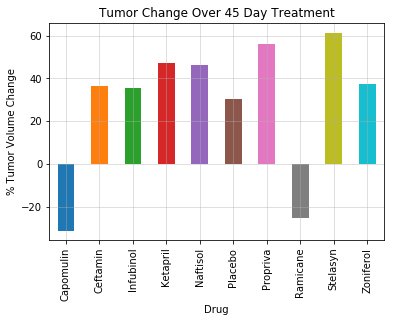

In [475]:
# Bar graph summarizing data
tumor_vol['pcnt_change'].plot(kind='bar')
plt.grid(alpha=0.5)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.show()